## data preprocessing

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch

In [2]:
data_dir = './data'

name_input = 'train-volume.tif'
name_label = 'train-labels.tif'

In [3]:
images = Image.open(os.path.join(data_dir, name_input))
labels = Image.open(os.path.join(data_dir, name_label))

In [4]:
h, w = images.size
nframe = images.n_frames
print(h, w, nframe)

512 512 30


In [5]:
train = os.path.join(data_dir, 'train')
val = os.path.join(data_dir, 'val')
test = os.path.join(data_dir, 'test')

In [6]:
for dir in [train, val, test]:
    if not os.path.exists(dir):
        os.makedirs(dir)

In [7]:
frame_id = np.arange(nframe)
np.random.shuffle(frame_id)

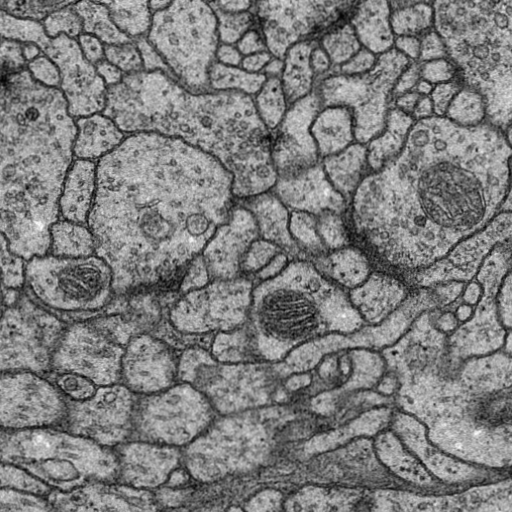

In [8]:
images.seek(1)
images

- data set : train-0.8 : val-0.1 : test-0.1

In [37]:
#train data
n_offset = 0
for i in range(24):
    images.seek(frame_id[i + n_offset])
    labels.seek(frame_id[i + n_offset])

    image = np.asarray(images)
    label = np.asarray(labels)

    np.save(os.path.join(data_dir, 'train', 'image_%03d.npy' % i), image)
    np.save(os.path.join(data_dir, 'train', 'label_%03d.npy' % i), label)

In [38]:
#val data
n_offset = 24
for i in range(3):
    images.seek(frame_id[i + n_offset])
    labels.seek(frame_id[i + n_offset])

    image = np.asarray(images)
    label = np.asarray(labels)

    np.save(os.path.join(data_dir, 'val', 'image_%03d.npy' % i), image)
    np.save(os.path.join(data_dir, 'val', 'label_%03d.npy' % i), label)

In [39]:
#val data
n_offset = 27
for i in range(3):
    images.seek(frame_id[i + n_offset])
    labels.seek(frame_id[i + n_offset])

    image = np.asarray(images)
    label = np.asarray(labels)

    np.save(os.path.join(data_dir, 'test', 'image_%03d.npy' % i), image)
    np.save(os.path.join(data_dir, 'test', 'label_%03d.npy' % i), label)

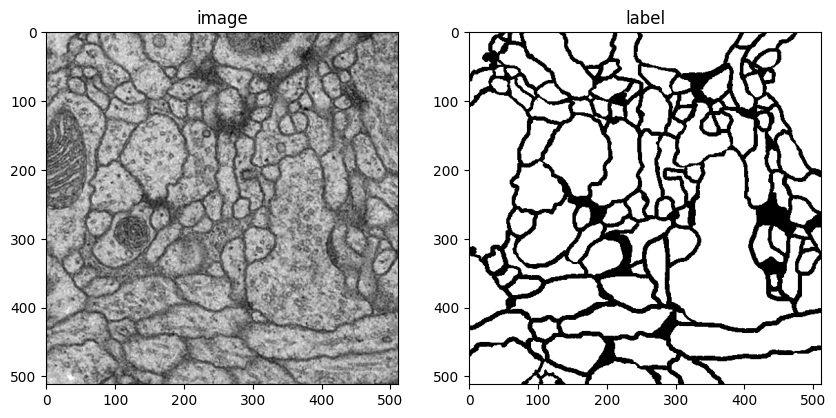

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('image')
plt.subplot(122)
plt.imshow(label, cmap='gray')
plt.title('label')
plt.show()

In [8]:
LEARNING_RATE = 1e-3
BATCH_SIZE = 3
NUM_EPOCHS = 10

data_dir = './data'
ckpt_dir = './checkpoint'
log_dir = './log'

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter

from torchvision import transforms, datasets

from ipywidgets import interact

In [10]:
import preprocessing
from preprocessing import MyDataset, ToTensor, Normalization, RandomFlip

In [11]:
data = MyDataset(data_dir=data_dir, phase='train')

In [12]:
data_ = data.__getitem__(1)

In [13]:
data_['labels'].shape, data_['images'].shape

((512, 512, 1), (512, 512, 1))

In [14]:
@interact(index=(0, len(data)-1))
def show_images(index=0):
    data_ = data[index]
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(data_['images'].squeeze())
    plt.subplot(122)
    plt.imshow(data_['labels'].squeeze())
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=23), Output()), _dom_classes=('widget-intera…

In [15]:
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ToTensor()])
data = MyDataset(data_dir=data_dir, phase='train', transform=transform)

In [16]:
data_ = data.__getitem__(0)

In [18]:
data[0]['image'].shape, data[0]['label'].shape

(torch.Size([1, 512, 512]), torch.Size([1, 512, 512]))

In [20]:
data[0]['image'].type(), data[0]['label'].type()

('torch.FloatTensor', 'torch.FloatTensor')